# The TexAT Detector for Rare Isotope Beam Experiments

In [23]:
import awkward as ak
import k3d
import numpy as np
from IPython.display import Image
from matplotlib.cm import viridis
from utils import displayed_as_mimebundle

TexAT (Texas Active Target) is a general-purpose detector developed by the Cyclotron Institute at Texas A&M University for low energy nuclear physics experiments.{cite:ps}`koshchiy_texat_2019` As an active-target detector, the fill gas serves as both the detection medium and the target, such that TexAT is well suited to conducting scattering and implantation experiments with rare isotope beams. 

TexAT has been upgraded over several experiments. In this section, the intial design of the detector will be outlined, followed by an exploration of the modifications relevant to the experiment discussed later in the chapter.

## Experiment Design

A primary {math}`{}^{10}B^{3+}` beam with 7 MeV/u was produced by the K500 cyclotron at the Cyclotron Institute, Texas A & M University.{cite:ps}`youngblood_texas_1991` These ions were directed towards a liquid-nitrogen (LN) cooled 9.2 cm gas cell, with 4 μm thick and 19 mm diameter Havar entrance and exit windows.{cite:ps}`hooker_structure_2019` At a pressure of the 870 Torr, the {math}`H_2` gas within the cell was used to facilitate an {math}`{}^{10}B(p,n){}^{10}C` exchange reaction. The resulting {math}`{}^{10}C` beam had an energy of 32.9 MeV, and an intensity of 7500–16500 particles per second (pps).

## Detector Overview

TexAT is comprised of a gas-filled TPC and MicroMeGaS (Micro-Mesh Gaseous Structure) particle detector, surrounded by an array of telescopes for particle identification and total energy measurement of ions that escape the active volume. A 3D model of these detectors is shown in {numref}`texat-detector-3d`.

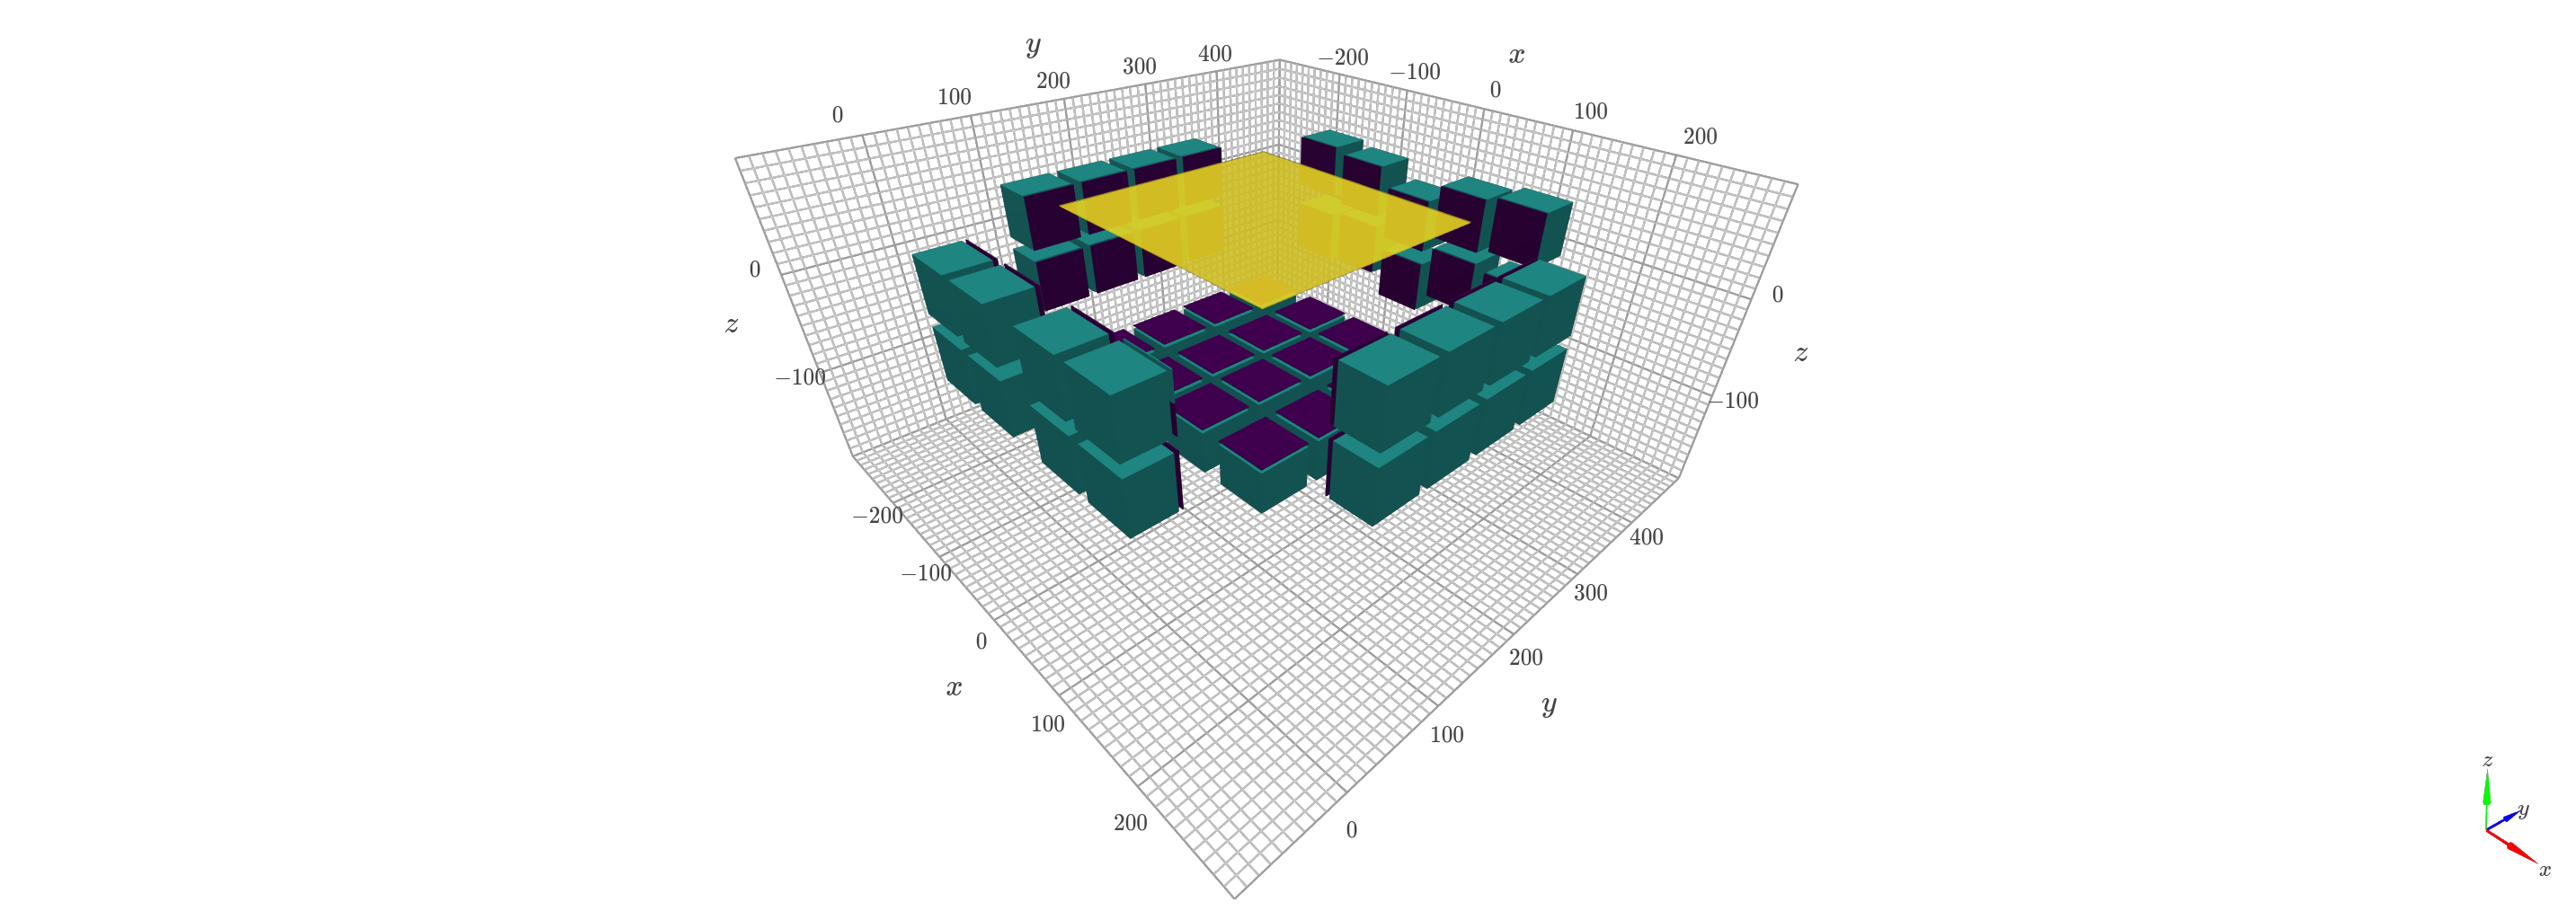

In [26]:
with open("../content/model/silicon.json", "r") as f:
    silicon = ak.from_json(f.read())
with open("../content/model/cesium.json", "r") as f:
    cesium = ak.from_json(f.read())
with open("../content/model/micromegas.json", "r") as f:
    micromegas = ak.from_json(f.read())


def rgb_to_packed(rgb):
    col = (np.clip(rgb, 0, 1) * 255).astype(np.uint8)
    return int(col[0] << 16 | col[1] << 8 | col[2])


col = viridis(np.linspace(0, 1, 3))

plot = k3d.plot(camera_auto_fit=False)

plot += k3d.mesh(silicon.vertex, silicon.index, color=rgb_to_packed(col[0]), name="Si")
plot += k3d.mesh(
    cesium.vertex, cesium.index, color=rgb_to_packed(col[1]), name="CsI(Tl)"
)
plot += k3d.mesh(
    micromegas.vertex * [[1, 1, -1]],
    micromegas.index,
    color=rgb_to_packed(col[2]),
    name="MicroMeGaS",
)
plot.camera = [
    475.765746444383,
    -236.658468205975,
    303.60900138312763,
    60.14126510733682,
    173.88348471035994,
    -143.0433116963373,
    -0.41591720629770645,
    0.37906690479277294,
    0.8266324208475794,
]
# Provide image fallback
with displayed_as_mimebundle() as c:
    display(plot, Image("image/texat-tpc-volume.png"))

To establish a uniform electric field within the ionisation region, a wire field-cage surrounds the active volume. 
An isographic 3D rendering of the combined detector with the field-cage and MicroMeGaS visible is shown in {numref}`texat-detector-2d`.

:::{figure} image/placeholder/texat-detector.png
:name: texat-detector-2d
:align: center
:alt: A time-projection-chamber detector with a MicroMeGaS anode and array of silicon detectors surrounding the exterior of the active volume.
:width: 400px

The TexAT detector configuration. The red arrow indicates the direction of the beam. The segmented anode is visible in green and red at the top of the detector, whilst the wire cage and the array of CsI(Tl) + Si detectors are visible around the outside of the TPC volume.
:::

(content:micromegas)=
### MicroMeGaS

The MicroMeGaS is a parallel-plate gas particle detector. It comprises of a micro-pattern anode, with a thin metallic mesh suspended at a height of 128 $\mu{m}$ above the surface (see {numref}`micromegas-schematic`). This _micro_-mesh partitions the gas into two juxtaposed volumes of differing potentials, forming a large drift region above the mesh, and a small amplification region between the mesh and the anode 

:::{figure} image/placeholder/drift-micromegas.png
:name: micromegas-schematic
:alt: A charged particle ionises the detector gas along its path, producing charge clusters which drift towards the anode. These clusters pass through a micromegas into the high-field amplification region, whose avalanches are detected on the anode.
:width: 400px
:align: center

Charge signal formation from charged particle ionisation. The small amplification region can be seen between the mesh and the anode strips, with a much higher electric field than that of the drift region, of the order $\sim\frac{\text{kV}}{\text{cm}}$. 
:::

In this manner, the detector behaves like an ideal parallel plate detector; the signals formed on the anode readout are predominantly determined by the electron mobility of the gas rather than that of the ions. The irregular pixellation of the anode facilitates high position resolution measurement of these signals. The bias for the mesh is constant across the detector geometry; individual region biasing is performed by applying different potentials to the corresponding elements of the anode.

:::{admonition} To Do
:class: margin

TODO: Get permission to reproduce figure
:::

The MicroMeGaS anode has an active area of $245\times224\,\text{mm}^2$, which is composed of three distinct conductive elements:
- single electrode rows ($112\times1.75\,\text{mm}^2$)
- chained electrode columns ($1.75\times224\,\text{mm}^2$) 
- single electrode pads ($3.5\times1.75\,\text{mm}^2$)

These elements are arranged into a three-region configuration: the two side regions are formed by interleaving strips and chains, and the central columnar region is composed from a regular grid of pads (see {numref}`micromegas-anode`). 

:::{admonition} To Do
:class: margin

TODO: Why don't these numbers add up
:::

:::{figure} image/placeholder/micromegas-anode.png
:name: micromegas-anode
:alt: A schematic diagram showing the different regions within the MicroMeGaS anode. A central pixellated column is visible, between two side regions formed from stagged strips and contiguous chains.
:width: 400px
:align: center

The segmentation plan of the MicroMeGaS anode. There are three distinct regions: a central column of $6\times 128$ pads, and two side regions with 64 interleaved rows (strips) and columns (chains). The strips are formed from single electrodes, whilst the chains are formed from staggered readout pads that are electrically connected together.
:::

The multiplexing scheme present in the side regions is used to reduce the number of channels from $64\times128$ to $64+64$, at a cost of lower resolution, sensitivity, and reconstruction ambiguity. The readout is mapped such that individual zones within the MicroMeGaS can be biased in order to create areas with different gas gains.

:::{admonition} To Do
:class: margin

TODO: add signal formation figure?
:::

### Silicon

In the TexAT configuration used in the experiment described in this chapter, only the silicon quadrant detectors were present. Without the thallium-doped cesium iodide detectors, only partial energy can be measured for escaping ions that punch through the silicon detectors. In these cases, particle identification must be performed by alternate means.

:::{admonition} To Do
:class: margin

TODO: cite these detectors
:::

Two families of silicon detector are used in the TexAT detector:
- MSQ25-1000 (Micron Semiconductor)
- KDP-1K (JSC, “Institute in Physical-Technical Problems”, Dubna, Russia)

Both of these detectors are configured with four ($25\times25\,\text{mm}^2$) quadrants, as shown in {numref}`silicon-schematic`. Although the MSQ25-1000 includes an additional rear quadrant ($50\times50\,\text{mm}^2$}), it was not read-out for this experiment.

:::{admonition} To Do
:class: margin

TODO: which detectors did we use? - Show 3D?
:::

:::{figure} image/placeholder/silicon-schematic.png
:name: silicon-schematic
:alt: Schematic views of the four different telescope configurations within the TexAT detector. All show a semi-regular grid of quadrant detectors, with one configuration showing a cutout for the beam.
:width: 400px
:align: center

A 3D rendering of the solid-state detector telescopes that surround the TPC: downstream array (top left); upstream array (bottom left); side array (rop right); bottom array (bottom right).
:::

### Ion Counter
For this experiment, a planar windowless ionisation chamber was placed immediately after the entrance window to the gas volume to detect the beam current. This can be used to help eliminate pile-up within the TPC, and trigger the acquisition system in coincidence with the other detectors.

## Readout Electronics

(content:get-architecture)=
### GET Architecture
TexAT uses the General Electronics for TPCs (GET) system for readout of the detectors.{cite:ps}`pollacco_get_2018` GET comprises of a heirarchy of electronic components, starting at the lowest level with the AGET (Asic for GET) chip to amplify, shape, and store the signals from each detector (see {numref}`get-schematic`). 

:::{admonition} To Do
:class: margin

TODO: cite this figure
:::

:::{figure} image/placeholder/get-schematic.png
:name: get-schematic
:alt: Schematic diagram of the GET electronics system. A series of channels is read by each AGET chip. There are four AGET chips for each AsAd board, and there are four AsAd boards for each CoBo.
:width: 400px
:align: center

A 3D rendering of the solid-state detector telescopes that surround the TPC: downstream array (top left); upstream array (bottom left); side array (rop right); bottom array (bottom right).
:::

Each channel possesses an independent trigger and continuously samples the filtered analogue signal from the shaper, with a sampling frequency between 1 and 100 MHz, using a 512-cell switch-capacitor circular buffer.{cite:ps}`pollacco_get_2018` A single AGET chip has 64 independent channels in addition to 4 floating channels that provide a measure of the electronic noise, known as fixed-pattern noise (FPN) channels. These FPN channels are distributed across the AGET chip in order to place one FPN channel at the edge of each chip.{cite:ps}`pollacco_get_2018` 

To read out all of the channels in a TexAT detector requires 24 AGET chips. There are 4 AGET chips on each AsAd (ASic and Analog to Digital converter) board, which digitises the signals from the SCA memory of the AGET chips using a 12-bit ADC.{cite:ps}`pollacco_get_2018`. The data from these ASAD boards are collected by a series of CoBo's (Concentration Boards), which timestamp the information and transmit it to the storage infrastructure. 

In order to synchronize the CoBos and generate a global trigger, an additional board called the MuTAnT (MUltiplicity Trigger ANd Time) is used.

### Signal Shaping

:::{admonition} To Do
:class: margin

TODO: cite MESYTEC
:::

The internal pre-amplification stage (CSA) in each AGET chip can be bypassed in cases where exernal pre-amplifiers need to be read-out by the GET electronics.{cite:ps}`pollacco_get_2018` Instead of using the internal GET pre-amplifier, the IC is connected to an external MESYTEC shaper (MSCF-16), whose signals are fed back into the Gain-2 stage of AGET chip, as discussed in {cite:ps}`koshchiy_texat_2019`.

:::{admonition} To Do
:class: margin

TODO: better figure for IC
:::


:::{figure} image/placeholder/external-shaper.png
:name: external-shaper
:alt: Schematic diagram of the bypass mechanism for the AGET chip.
:width: 400px
:align: center

A schematic diagram of the shaper bypass facility of AGET chips.
:::